In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [4]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


면세점 이외    2772
Name: 판매유형별, dtype: int64

In [5]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [6]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [7]:
df["판매유형별"].value_counts()

면세점 이외    2772
Name: 판매유형별, dtype: int64

Q1.

In [20]:
df.rename(columns = {"데이터":"백만"}, inplace = True)
df["연도"] = df["시점"].map(lambda x : int(x.split(".")[0]))
df["분기"] = df["시점"].map(lambda x : int(x.split(".")[1].split("/")[0]))
df[["백만", "연도", "분기"]].describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


Q2.

In [27]:
pd.pivot_table(df, index="국가(대륙)별", columns="연도", values="백만", aggfunc="sum")

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


Q3.

In [55]:
df1 = df[df["연도"] == 2020]
df1 = df1.groupby(["국가(대륙)별"])["백만"].sum()
df1 = pd.DataFrame(df1).unstack()
df1

    국가(대륙)별   
백만  기타             44438
    대양주            16255
    미국            255384
    아세안(ASEAN)    105360
    유럽연합(EU)       39865
    일본            220730
    중국            289446
    중남미            12563
    중동             11467
dtype: int64

([<matplotlib.patches.Wedge at 0x28d3a2490>,
 [Text(1.0892013356067742, 0.1537545137952687, '기타'),
  Text(1.0400143673008424, 0.3582877555929429, '대양주'),
  Text(0.4098480325332347, 1.0207960571184809, '미국'),
  Text(-0.7551199625244165, 0.7998711409953005, '아세안(ASEAN)'),
  Text(-1.0310770261840232, 0.3832494828117988, '유럽연합(EU)'),
  Text(-0.9824604092205156, -0.4947439179153768, '일본'),
  Text(0.5328673556422375, -0.9623161545411411, '중국'),
  Text(1.0931055171695327, -0.12296474427057687, '중남미'),
  Text(1.0992798480232606, -0.039797182437420246, '중동')],
 [Text(0.5941098194218768, 0.08386609843378291, '4%'),
  Text(0.5672805639822777, 0.19542968486887793, '2%'),
  Text(0.22355347229085526, 0.5567978493373531, '26%'),
  Text(-0.41188361592240896, 0.43629334963380023, '11%'),
  Text(-0.5624056506458308, 0.20904517244279933, '4%'),
  Text(-0.535887495938463, -0.26986031886293277, '22%'),
  Text(0.2906549212594023, -0.5248997206588042, '29%'),
  Text(0.5962393730015633, -0.06707167869304193, 

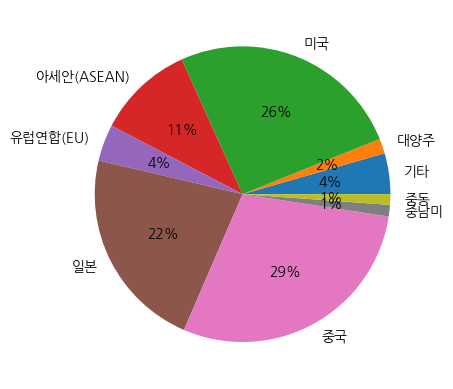

In [59]:
labels = ["기타", "대양주", "미국", "아세안(ASEAN)", "유럽연합(EU)", "일본", "중국", "중남미", "중동"]
plt.pie(df1, labels = labels, autopct='%.0f%%')

Q4.

In [28]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [37]:
object_subset = ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]
countries_subset = ["미국", "중국", "일본"]
df2 = df[(df["상품군별"].isin(object_subset)) & (df["국가(대륙)별"].isin(countries_subset)) & (df["연도"] < 2022)]
df2

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
807,일본,화장품,면세점 이외,2020.4/4,11994,2020,4
808,일본,화장품,면세점 이외,2021.1/4,12421,2021,1
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3


<AxesSubplot:xlabel='연도', ylabel='백만'>

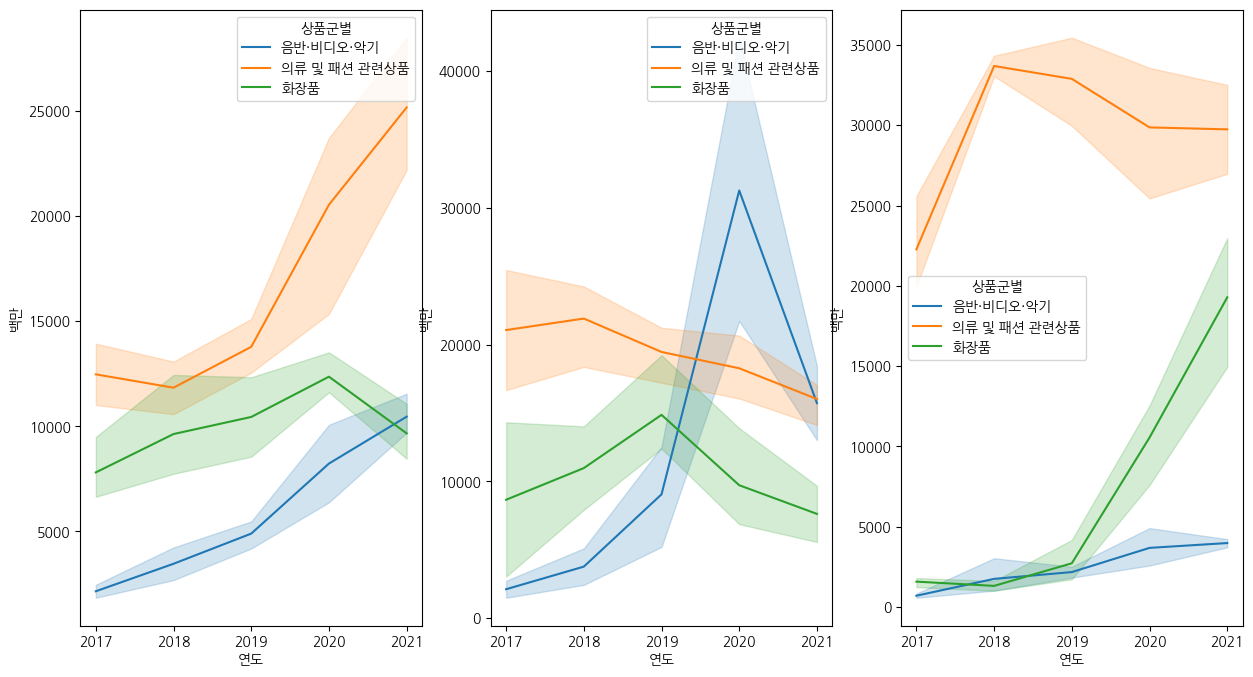

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15,8))

sns.lineplot(data=df2[df2["국가(대륙)별"]=="미국"], x = '연도', y = '백만', hue = '상품군별', ax=axes[0])
sns.lineplot(data=df2[df2["국가(대륙)별"]=="중국"], x = '연도', y = '백만', hue = '상품군별', ax=axes[1])
sns.lineplot(data=df2[df2["국가(대륙)별"]=="일본"], x = '연도', y = '백만', hue = '상품군별', ax=axes[2])